# Ordinary Least Squares in Python



## Statsmodels

Statsmodel is a Python library designed for more statistically-oriented approaches to data analysis, with an emphasis on econometric analyses. It integrates well with the [pandas](http://pandas.pydata.org) and [numpy](http://numpy.org) libraries we covered in a previous post. It also has built in support for many of the statistical tests to check the quality of the fit and a dedicated set of plotting functions to visualize and diagnose the fit. [Scikit-learn](http://scikit-learn.org/stable/) also has support for linear regression, including many forms of regularized regression lacking in statsmodels, but it lacks the rich set of statistical tests and diagnostics that have been developed for linear models.

## Linear Regression and Ordinary Least Squares

Linear regression one of the simplest and most commonly used modeling techniques. It makes very strong assumptions about the relationship between the predictor variables (the X) and the response (the Y). It assumes that this relationship takes the form:

$y = \beta_0 + \beta_1 * x$

Ordinary Least Squares is the simplest and most common estimator in which the two $\beta$s are chosen to minimize the square of the distance between the predicted values and the actual values. Even though this model is quite rigid and often does not reflect the true relationship, this still remains a popular approach for several reasons. For one, it is computationally cheap to calculate the coefficients. It is also easier to interpret than more sophisticated models, and in situations where the goal is understanding a simple model in detail, rather than estimating the response well, they can provide insight into what the model captures. Finally, in situations where there is a lot of noise, it may be hard to find the true functional form, so a constrained model can perform quite well compared to a complex model which is more affected by noise.

The resulting model is represented as follows:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 * x$

Here the hats on the variables represent the fact that they are estimated from the data we have available. The $\beta$s are termed the parameters of the model or the coefficients. $\beta_0$ is called the constant term or the intercept.

## Ordinary Least Squares Using Statsmodels

The statsmodels package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module. 

To start with we load the [Longley dataset](http://stat.ethz.ch/R-manual/R-patched/library/datasets/html/longley.html) of US macroeconomic data from the [Rdatasets](http://vincentarelbundock.github.io/Rdatasets/) website.

In [1]:
# load numpy and pandas for data manipulation
import numpy as np
import pandas as pd
# and matplotlib for graphs
import matplotlib.pyplot as plt

# load statsmodels as alias ``sm``
import statsmodels.api as sm

# load the longley dataset into a pandas data frame - first column (year) used as row labels
longley = pd.read_csv('longley.csv')
longley.head()

,Unnamed: 0,employment,price,gnp,armedforces
0,1,60323,83.0,234289,1590
1,2,61122,88.5,259426,1456
2,3,60171,88.2,258054,1616
3,4,61187,89.5,284599,1650
4,5,63221,96.2,328975,3099


We will use the variable Total Derived Employment (``'Employed'``) as our response ``y`` and Gross National Product (``'GNP'``) as our predictor ``X``. 

1. Create a linear regression model that can predict Employment based on GNP as independent variable

In [2]:
x = longley['gnp']
# Without this the model will be fit without intercept
x = sm.add_constant(x)
y = longley['employment']

Using statsmodel OLS method create a model trained on GNP

In [3]:
model = sm.OLS(y, x)

Fit the model by calling the OLS object's ``fit()`` method. 

In [4]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             employment   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           8.36e-12
Time:                        09:23:00   Log-Likelihood:                -125.43
No. Observations:                  16   AIC:                             254.9
Df Residuals:                      14   BIC:                             256.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.184e+04    681.372     76.087      0.0

D:\Applications\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


Print the slope of GNP predictor and the intercept variables

In [5]:
print('Params=', result.params)
print('R²=', result.rsquared)
print('F=', result.fvalue)

Params= const    51843.589782
gnp          0.034752
dtype: float64
R²= 0.9673737718541234
F= 415.1026206708294


Pick 100 hundred points equally spaced from the min to the max of GNP 
Calculate the predicted values and plot the graph between X and Y

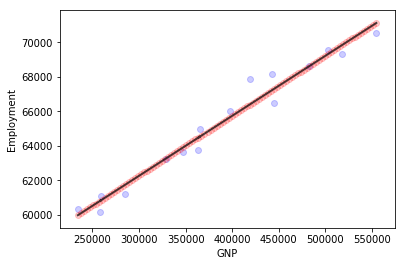

In [6]:
# We pick 100 hundred points equally spaced from the min to the max
min = longley['gnp'].min()
max = longley['gnp'].max()
gnp = pd.DataFrame({ 'gnp': np.linspace(min,max,100) })
X = sm.add_constant(gnp)

# Now we calculate the predicted value
Y = model.predict(result.params, X)

# Plot the raw data
plt.scatter(longley['gnp'], longley['employment'],  color='blue', alpha=0.20)
plt.xlabel("GNP")
plt.ylabel("Employment")

# Add the prediction/regression line
plt.scatter(gnp, Y,  color='red', alpha=0.20)
plt.plot(longley['gnp'], model.predict(result.params), color='black', alpha=0.70, linewidth=2)
plt.show()

Statsmodels also provides a formulaic interface . Note that this requires the use of a different api to statsmodels, and the class is now called ``ols`` rather than ``OLS``. The argument ``formula`` allows you to specify the response and the predictors using the column names of the input data frame ``data``. 

Task : import formula api as alias smf and then create OLS based model using the formula Employed ~ GNP

Hint: smf.ols(formula='Employed ~ GNP', data=df).fit()

Also print a summary of the object created in the previous step 



In [7]:
# import formula api as alias smf
import statsmodels.formula.api as smf

# formula: response ~ predictors
model = smf.ols('employment ~ gnp', data = longley)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             employment   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           8.36e-12
Time:                        09:27:03   Log-Likelihood:                -125.43
No. Observations:                  16   AIC:                             254.9
Df Residuals:                      14   BIC:                             256.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.184e+04    681.372     76.087      0.0

D:\Applications\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


This summary provides quite a lot of information about the fit. The pats of the table we think are the most important are bolded in the description below.

The left part of the first table provides basic information about the model fit:

<table>
<thead>
<tr>
<th>Element</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>Dep. Variable</td>
<td>Which variable is the response in the model</td>
</tr>
<tr>
<td>Model</td>
<td>What model you are using in the fit</td>
</tr>
<tr>
<td>Method</td>
<td>How the parameters of the model were calculated</td>
</tr>
<tr>
<td>No. Observations</td>
<td>The number of observations (examples)</td>
</tr>
<tr>
<td>DF Residuals</td>
<td>Degrees of freedom of the residuals. Number of observations - number of parameters</td>
</tr>
<tr>
<td>DF Model</td>
<td>Number of parameters in the model (not including the constant term if present)</td>
</tr>
</tbody>
</table>

The right part of the first table shows the goodness of fit

<table>
<thead>
<tr>
<th>Element</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>**R-squared**</td>
<td>The [coefficient of determination](http://en.wikipedia.org/wiki/Coefficient_of_determination). A statistical measure of how well the regression line approximates the real data points</td>
</tr>
<tr>
<td>**Adj. R-squared**</td>
<td>The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals</td>
</tr>
<tr>
<td>F-statistic</td>
<td>A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals</td>
</tr>
<tr>
<td>Prob (F-statistic)</td>
<td>The probability that you would get the above statistic, given the null hypothesis that they are unrelated</td>
</tr>
<tr>
<td>Log-likelihood</td>
<td>The log of the likelihood function.</td>
</tr>
<tr>
<td>AIC</td>
<td>The [Akaike Information Criterion](http://en.wikipedia.org/wiki/Akaike_information_criterion). Adjusts the log-likelihood based on the number of observations and the complexity of the model.</td>
</tr>
<tr>
<td>BIC</td>
<td>The [Bayesian Information Criterion](http://en.wikipedia.org/wiki/Bayesian_information_criterion). Similar to the AIC, but has a higher penalty for models with more parameters.</td>
</tr>
</tbody>
</table>

The second table reports for each of the coefficients

<table>
<thead>
<tr>
<th></th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td></td>
<td>The name of the term in the model</td>
</tr>
<tr>
<td>coef</td>
<td>The estimated value of the coefficient</td>
</tr>
<tr>
<td>std err</td>
<td>The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.</td>
</tr>
<tr>
<td>t</td>
<td>The t-statistic value. This is a measure of how statistically significant the coefficient is.</td>
</tr>
<tr>
<td><strong>P &gt; |t|</strong></td>
<td>P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.</td>
</tr>
<tr>
<td>**[95.0% Conf. Interval]**</td>
<td>The lower and upper values of the 95% confidence interval</td>
</tr>
</tbody>
</table>

Finally, there are several statistical tests to assess the distribution of the residuals 

<table>
<thead>
<tr>
<th>Element</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>Skewness</td>
<td>A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).</td>
</tr>
<tr>
<td>Kurtosis</td>
<td>A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).</td>
</tr>
<tr>
<td>Omnibus</td>
<td>D'Angostino's test. It provides a combined statistical test for the presence of skewness and kurtosis.</td>
</tr>
<tr>
<td>Prob(Omnibus)</td>
<td>The above statistic turned into a probability</td>
</tr>
<tr>
<td>Jarque-Bera</td>
<td>A different test of the skewness and kurtosis</td>
</tr>
<tr>
<td>Prob (JB)</td>
<td>The above statistic turned into a probability</td>
</tr>
<tr>
<td>Durbin-Watson</td>
<td>A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis</td>
</tr>
<tr>
<td>Cond. No</td>
<td>A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).</td>
</tr>
</tbody>
</table>


As a final note, if you don't want to include a constant term in your model, you can exclude it using the minus operator.

Task : Create model with Zero intercept and plot X-Y predicted/Y-original values on a graph

Task: Create model with non-Zero intercept and plot X-Y predicted/Y-original values on a graph

                            OLS Regression Results                            
Dep. Variable:             employment   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     395.3
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           3.44e-12
Time:                        12:49:53   Log-Likelihood:                -173.65
No. Observations:                  16   AIC:                             349.3
Df Residuals:                      15   BIC:                             350.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gnp            0.1607      0.008     19.883      0.0

D:\Applications\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
D:\Applications\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


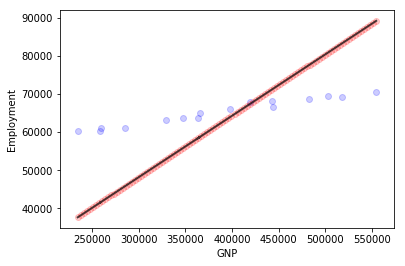

In [46]:
# Fit the no-intercept model without adding a constant column to X
x = longley['gnp']
y = longley['employment']
model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

# Similar with formula API
model = smf.ols('employment ~ gnp - 1', data = longley)
result = model.fit()
print(result.summary())

# We pick 100 hundred points equally spaced from the min to the max
min = longley['gnp'].min()
max = longley['gnp'].max()
X = pd.DataFrame({ 'gnp': np.linspace(min,max,100) })

# Now we calculate the predicted value
Y = model.predict(result.params, X)

# Plot the raw data
plt.scatter(longley['gnp'], longley['employment'],  color='blue', alpha=0.20)
plt.xlabel("GNP")
plt.ylabel("Employment")

# Add the prediction/regression line
plt.scatter(gnp, Y,  color='red', alpha=0.20)
plt.plot(longley['gnp'], model.predict(result.params), color='black', alpha=0.70, linewidth=2)
plt.show()


## Correlation and Causation

Clearly there is a relationship or correlation between GNP and total employment. So does that mean a change in GNP cause a change in total employment? Or does a change in total employment cause a change in GNP?

**The model parameters indicate that employment increases by 0.1607 (1000s) for an increase of 1 M$ in GDP.**